# Welcome !
In this notebook, we will build regression models to predict laptop prices based on some features like brand, operating system, weight, etc..

[Click to view dataset](https://www.kaggle.com/datasets/anubhavgoyal10/laptop-prices-dataset)

# 1. Data Exploration and Preprocessing

### 1.1 Import Libraries

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

### 1.2 Read Dataset

In [2]:
# !kaggle datasets download -d anubhavgoyal10/laptop-prices-dataset
# !unzip laptop-prices-dataset.zip

In [3]:
df = pd.read_csv('laptopPrice.csv')

### 1.3 Explore and Preprocess

Using `df.info()`, we can gain initial information about the dataset columns (features) and their datatypes.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [5]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


Using `df.head()`, we can browse the first five rows of the dataset.

In [6]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


### 1.4 Data Visualization

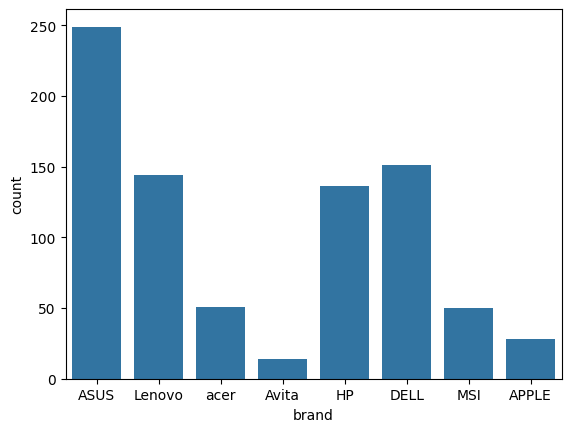

In [7]:
sns.countplot(x=df['brand'])
plt.show()

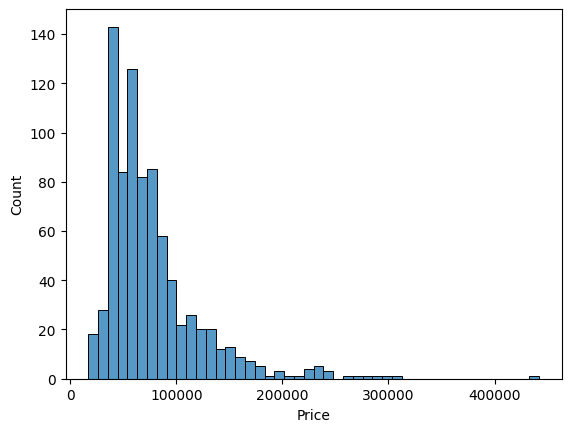

In [8]:
# plot prices
sns.histplot(x=df['Price'])
plt.show()

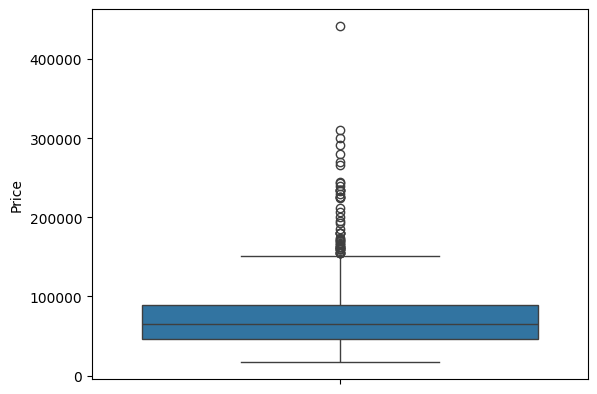

In [9]:
# check for outliers
sns.boxplot(df['Price'])
plt.show()

# 2. Data Preprocessing

### 2.1 Remove Outliers

In [10]:
q1_price = df['Price'].quantile(0.25)
q3_price = df['Price'].quantile(0.75)
iqr_price = q3_price - q1_price

lower_bound_price = q1_price - 1.5*iqr_price
upper_bound_price = q3_price + 1.5*iqr_price

df = df[(df['Price'] >= lower_bound_price) & (df['Price'] <= upper_bound_price)]

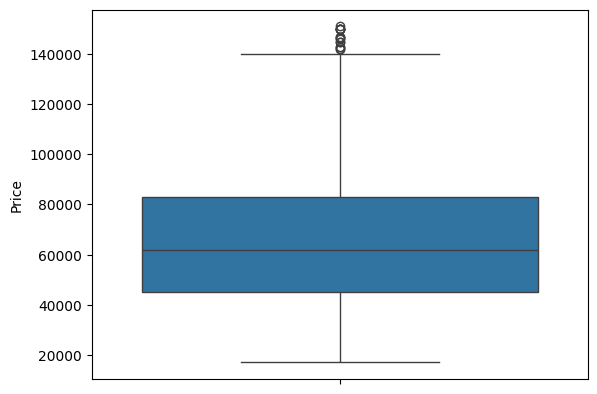

In [11]:
sns.boxplot(df['Price'])
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 773 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              773 non-null    object
 1   processor_brand    773 non-null    object
 2   processor_name     773 non-null    object
 3   processor_gnrtn    773 non-null    object
 4   ram_gb             773 non-null    object
 5   ram_type           773 non-null    object
 6   ssd                773 non-null    object
 7   hdd                773 non-null    object
 8   os                 773 non-null    object
 9   os_bit             773 non-null    object
 10  graphic_card_gb    773 non-null    object
 11  weight             773 non-null    object
 12  warranty           773 non-null    object
 13  Touchscreen        773 non-null    object
 14  msoffice           773 non-null    object
 15  Price              773 non-null    int64 
 16  rating             773 non-null    object
 17  Nu

### 2.2 Encoding Categorical Features

We can get further information about each column possible values using `value_counts()`.\
\
This is useful for encoding categorical columns to know either the column should be encoded **manually** or using **one-hot encoding**, or maybe we **don't need** that column !

In [13]:
for col in df.columns:
    print(df[col].value_counts())
    print('-'*30)

brand
ASUS      234
DELL      151
Lenovo    135
HP        130
acer       49
MSI        43
APPLE      17
Avita      14
Name: count, dtype: int64
------------------------------
processor_brand
Intel    572
AMD      184
M1        17
Name: count, dtype: int64
------------------------------
processor_name
Core i5         282
Core i3         164
Core i7          86
Ryzen 5          82
Ryzen 7          55
Ryzen 3          26
Celeron Dual     24
Ryzen 9          22
M1               17
Pentium Quad     13
Core i9           2
Name: count, dtype: int64
------------------------------
processor_gnrtn
11th             326
Not Available    220
10th             172
8th               39
7th                9
9th                5
4th                1
12th               1
Name: count, dtype: int64
------------------------------
ram_gb
8 GB     412
4 GB     223
16 GB    138
Name: count, dtype: int64
------------------------------
ram_type
DDR4       676
LPDDR4X     53
LPDDR4      24
LPDDR3       8
DDR5    

Based on the previous cell, we divide the features into three groups.

In [14]:
onehot = ['brand', 'processor_brand', 'processor_name', 'ram_type', 'os', 'weight']
manual = ['processor_gnrtn', 'ram_gb', 'ssd', 'hdd', 'os_bit', 'graphic_card_gb', 'warranty', 'Touchscreen', 'msoffice', 'rating']
to_delete = ['Number of Reviews', 'Number of Ratings']

print(len(onehot)+len(manual)+len(to_delete))

18


One-hot encoding can be applied using `pd.get_dummies()`

In [15]:
df = pd.get_dummies(df, columns=onehot, dtype='int64')
df.head()

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,graphic_card_gb,warranty,Touchscreen,msoffice,Price,...,ram_type_DDR5,ram_type_LPDDR3,ram_type_LPDDR4,ram_type_LPDDR4X,os_DOS,os_Mac,os_Windows,weight_Casual,weight_Gaming,weight_ThinNlight
0,10th,4 GB,0 GB,1024 GB,64-bit,0 GB,No warranty,No,No,34649,...,0,0,0,0,0,0,1,1,0,0
1,10th,4 GB,0 GB,1024 GB,64-bit,0 GB,No warranty,No,No,38999,...,0,0,0,0,0,0,1,1,0,0
2,10th,4 GB,0 GB,1024 GB,64-bit,0 GB,No warranty,No,No,39999,...,0,0,0,0,0,0,1,1,0,0
3,10th,8 GB,512 GB,0 GB,32-bit,2 GB,No warranty,No,No,69990,...,0,0,0,0,0,0,1,1,0,0
4,Not Available,4 GB,0 GB,512 GB,64-bit,0 GB,No warranty,No,No,26990,...,0,0,0,0,0,0,1,1,0,0


We notice the number of columns has increased to 47 as a result of one-hot encoding.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 773 entries, 0 to 822
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   processor_gnrtn              773 non-null    object
 1   ram_gb                       773 non-null    object
 2   ssd                          773 non-null    object
 3   hdd                          773 non-null    object
 4   os_bit                       773 non-null    object
 5   graphic_card_gb              773 non-null    object
 6   warranty                     773 non-null    object
 7   Touchscreen                  773 non-null    object
 8   msoffice                     773 non-null    object
 9   Price                        773 non-null    int64 
 10  rating                       773 non-null    object
 11  Number of Ratings            773 non-null    int64 
 12  Number of Reviews            773 non-null    int64 
 13  brand_APPLE                  773 non-nul

Manually encoded columns differ depending on their values.\
For example some columns should be without 'GB' or without 'th'. so, we perform **Manual Encoding**.

In [17]:
df['processor_gnrtn'] = df['processor_gnrtn'].replace({'Not Available': -1, '10th':10, '11th':11, '7th':7, '8th':8, '9th':9, '4th':4, '12th': 12})
df['ram_gb'] = df['ram_gb'].str.replace('GB', '').astype(int)
df['ssd'] = df['ssd'].str.replace('GB', '').astype(int)
df['hdd'] = df['hdd'].str.replace('GB', '').astype(int)
df['graphic_card_gb'] = df['graphic_card_gb'].str.replace('GB', '').astype(int)
df['os_bit'] = df['os_bit'].replace({'64-bit': 64, '32-bit': 32})
df['warranty'] = df['warranty'].replace({'No warranty':0, '1 year': 1, '2 years': 2, '3 years': 3})
df['Touchscreen'] = df['Touchscreen'].replace({'Yes': 1, 'No': 0})
df['msoffice'] = df['msoffice'].replace({'Yes': 1, 'No': 0})
df['rating'] = df['rating'].str[0].astype(int)

We drop the columns that are not useful using `df.drop()`

In [18]:
df.drop(columns=to_delete, inplace=True)

In [19]:
df.head()

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,graphic_card_gb,warranty,Touchscreen,msoffice,Price,...,ram_type_DDR5,ram_type_LPDDR3,ram_type_LPDDR4,ram_type_LPDDR4X,os_DOS,os_Mac,os_Windows,weight_Casual,weight_Gaming,weight_ThinNlight
0,10,4,0,1024,64,0,0,0,0,34649,...,0,0,0,0,0,0,1,1,0,0
1,10,4,0,1024,64,0,0,0,0,38999,...,0,0,0,0,0,0,1,1,0,0
2,10,4,0,1024,64,0,0,0,0,39999,...,0,0,0,0,0,0,1,1,0,0
3,10,8,512,0,32,2,0,0,0,69990,...,0,0,0,0,0,0,1,1,0,0
4,-1,4,0,512,64,0,0,0,0,26990,...,0,0,0,0,0,0,1,1,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 773 entries, 0 to 822
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   processor_gnrtn              773 non-null    int64
 1   ram_gb                       773 non-null    int64
 2   ssd                          773 non-null    int64
 3   hdd                          773 non-null    int64
 4   os_bit                       773 non-null    int64
 5   graphic_card_gb              773 non-null    int64
 6   warranty                     773 non-null    int64
 7   Touchscreen                  773 non-null    int64
 8   msoffice                     773 non-null    int64
 9   Price                        773 non-null    int64
 10  rating                       773 non-null    int64
 11  brand_APPLE                  773 non-null    int64
 12  brand_ASUS                   773 non-null    int64
 13  brand_Avita                  773 non-null    int64
 14 

Check for duplicated data and drop them if existed using `df.duplicated().sum()` and `df.drop_duplicates()`.

In [21]:
df.duplicated().sum()

29

In [22]:
df.drop_duplicates(inplace=True, ignore_index=True)
df.duplicated().sum()

0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   processor_gnrtn              744 non-null    int64
 1   ram_gb                       744 non-null    int64
 2   ssd                          744 non-null    int64
 3   hdd                          744 non-null    int64
 4   os_bit                       744 non-null    int64
 5   graphic_card_gb              744 non-null    int64
 6   warranty                     744 non-null    int64
 7   Touchscreen                  744 non-null    int64
 8   msoffice                     744 non-null    int64
 9   Price                        744 non-null    int64
 10  rating                       744 non-null    int64
 11  brand_APPLE                  744 non-null    int64
 12  brand_ASUS                   744 non-null    int64
 13  brand_Avita                  744 non-null    int64

# 3. Model Building

Now, we are ready to feed data to our models.\
let's split the data into X,y then split them into training and testing sets.

In [24]:
X = df.drop('Price', axis=1)
y = df['Price']

In [25]:
print(f'Features shape : {X.shape}')
print(f'Target shape : {y.shape}')

Features shape : (744, 44)
Target shape : (744,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.1 Linear Regression Model

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(mean_squared_error(y_test, y_pred_lr))
print(r2_score(y_test, y_pred_lr))

129032078.22892188
0.850079706606199


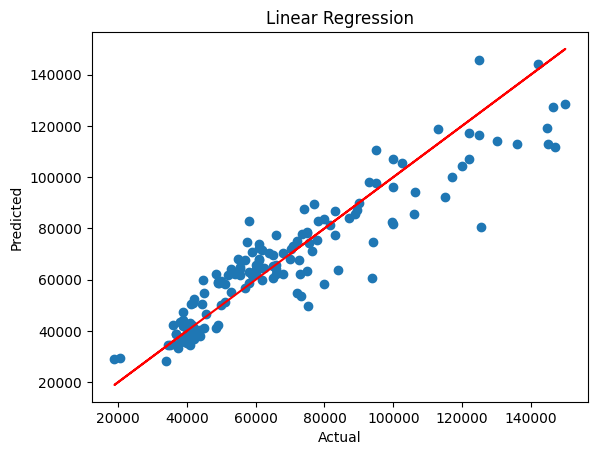

In [28]:
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

plt.plot(y_test,y_test, color='red')
plt.show()

### 3.2 Decision Tree Model

In [29]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(mean_squared_error(y_test, y_pred_dt))
print(r2_score(y_test, y_pred_dt))

300402874.38460106
0.6509667387966954


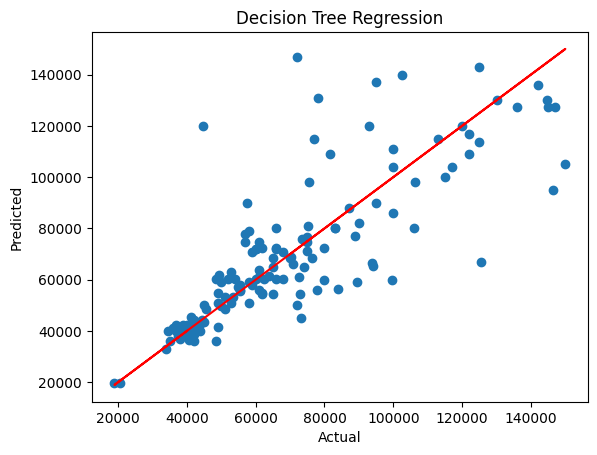

In [30]:
plt.scatter(y_test, y_pred_dt)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression')

plt.plot(y_test,y_test, color='red')
plt.show()

### 3.3 Random Forest Model

In [31]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(mean_squared_error(y_test, y_pred_rf))
print(r2_score(y_test, y_pred_rf))

142010233.79376107
0.8350005966926228


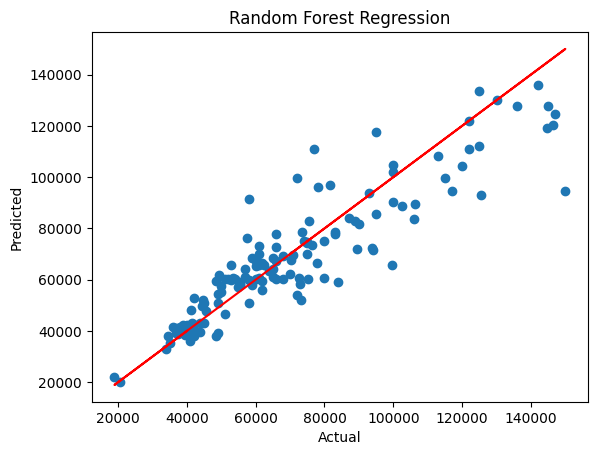

In [32]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression')

plt.plot(y_test,y_test, color='red')
plt.show()